In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('fraudTrain.csv')
df_test = pd.read_csv("fraudTest.csv")

In [4]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df_train.drop(df_train.columns[0], axis=1, inplace=True)
df_test.drop(df_test.columns[0], axis=1, inplace=True)
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
#df_train.isna().sum()
#df_test.isna().sum()

In [7]:
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

In [8]:
df_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

### About Data

index - Unique Identifier for each row<br>
trans_date_trans_time - Transaction DateTime<br>
cc_num - Credit Card Number of Customer<br>
merchant - Merchant Name<br>
category - Category of Merchant<br>
amt - Amount of Transaction<br>
first - First Name of Credit Card Holder<br>
last - Last Name of Credit Card Holder<br>
gender - Gender of Credit Card Holder<br>
street - Street Address of Credit Card Holder<br>
city - City of Credit Card Holder<br>
state - State of Credit Card Holder<br>
zip - Zip of Credit Card Holder<br>
lat - Latitude Location of Credit Card Holder<br>
long - Longitude Location of Credit Card Holder<br>
city_pop - Credit Card Holder's City Population<br>
job - Job of Credit Card Holder<br>
dob - Date of Birth of Credit Card Holder<br>
trans_num - Transaction Number<br>
unix_time - UNIX Time of transaction<br>
merch_lat - Latitude Location of Merchant<br>
merch_long - Longitude Location of Merchant<br>
is_fraud - Fraud Flag <--- Target Class<br>

In [9]:
df_train.rename(columns={"trans_date_trans_time":"transaction_time","cc_num":"credit_card_number",
                         "amt":"amount(usd)","trans_num":"transaction_id"},inplace=True)

In [10]:
df_test.rename(columns={"trans_date_trans_time":"transaction_time","cc_num":"credit_card_number",
                         "amt":"amount(usd)","trans_num":"transaction_id"},inplace=True)

In [11]:
# Convert datetime columns
# transaction_time and dob should be in pd.datetime format and we also convert unix_time to exact timestamp

In [12]:
df_train["transaction_time"] = pd.to_datetime(df_train["transaction_time"], infer_datetime_format=True)
df_train["dob"] = pd.to_datetime(df_train["dob"], infer_datetime_format=True)

In [13]:
df_test["transaction_time"] = pd.to_datetime(df_test["transaction_time"], infer_datetime_format=True)
df_test["dob"] = pd.to_datetime(df_test["dob"], infer_datetime_format=True)

In [14]:
from datetime import datetime

# Apply function utcfromtimestamp and drop column unix_time
df_train['time'] = df_train['unix_time'].apply(datetime.utcfromtimestamp)
df_train.drop('unix_time', axis=1)

# Add cloumn hour of day
df_train['hour_of_day'] = df_train.time.dt.hour

In [15]:
df_test['time'] = df_test['unix_time'].apply(datetime.utcfromtimestamp)
df_test.drop('unix_time', axis=1)

# Add cloumn hour of day
df_test['hour_of_day'] = df_test.time.dt.hour

In [16]:
df_train['month'] = df_train.time.dt.month
df_test['month'] = df_test.time.dt.month

In [17]:
df_train[['time','hour_of_day']]

,time,hour_of_day
0,2012-01-01 00:00:18,0
1,2012-01-01 00:00:44,0
2,2012-01-01 00:00:51,0
3,2012-01-01 00:01:16,0
4,2012-01-01 00:03:06,0
...,...,...
1296670,2013-06-21 12:12:08,12
1296671,2013-06-21 12:12:19,12
1296672,2013-06-21 12:12:32,12
1296673,2013-06-21 12:13:36,12


In [18]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df_train['is_fraud'].value_counts()[0]/len(df_train) * 100,2), '% of the dataset')
print('Frauds', round(df_train['is_fraud'].value_counts()[1]/len(df_train) * 100,2), '% of the dataset')

No Frauds 99.42 % of the dataset
Frauds 0.58 % of the dataset


In [19]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df_test['is_fraud'].value_counts()[0]/len(df_test) * 100,2), '% of the dataset')
print('Frauds', round(df_test['is_fraud'].value_counts()[1]/len(df_test) * 100,2), '% of the dataset')

No Frauds 99.61 % of the dataset
Frauds 0.39 % of the dataset


In [20]:
import datetime as dt
df_train['age']=dt.date.today().year-pd.to_datetime(df_train['dob']).dt.year
df_test['age']=dt.date.today().year-pd.to_datetime(df_test['dob']).dt.year

In [21]:
df_train.columns

Index(['transaction_time', 'credit_card_number', 'merchant', 'category',
       'amount(usd)', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'transaction_id',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'time',
       'hour_of_day', 'month', 'age'],
      dtype='object')

In [22]:
features = ['hour_of_day','age','month','category','amount(usd)','gender','lat','long','is_fraud']

df_train = df_train[features]
df_test = df_test[features]

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   hour_of_day  1296675 non-null  int64  
 1   age          1296675 non-null  int64  
 2   month        1296675 non-null  int64  
 3   category     1296675 non-null  object 
 4   amount(usd)  1296675 non-null  float64
 5   gender       1296675 non-null  object 
 6   lat          1296675 non-null  float64
 7   long         1296675 non-null  float64
 8   is_fraud     1296675 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 98.9+ MB


In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   hour_of_day  555719 non-null  int64  
 1   age          555719 non-null  int64  
 2   month        555719 non-null  int64  
 3   category     555719 non-null  object 
 4   amount(usd)  555719 non-null  float64
 5   gender       555719 non-null  object 
 6   lat          555719 non-null  float64
 7   long         555719 non-null  float64
 8   is_fraud     555719 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 42.4+ MB


In [25]:
df_train['category'] = df_train.category.str.split('_net', expand = True)[0]
df_test['category'] = df_test.category.str.split('_net', expand = True)[0]

In [26]:
df_train['category'] = df_train.category.str.split('_pos', expand = True)[0]
df_test['category'] = df_test.category.str.split('_pos', expand = True)[0]

In [27]:
df_train.head()

,hour_of_day,age,month,category,amount(usd),gender,lat,long,is_fraud
0,0,35,1,misc,4.97,F,36.0788,-81.1781,0
1,0,45,1,grocery,107.23,F,48.8878,-118.2105,0
2,0,61,1,entertainment,220.11,M,42.1808,-112.2620,0
3,0,56,1,gas_transport,45.00,M,46.2306,-112.1138,0
4,0,37,1,misc,41.96,M,38.4207,-79.4629,0


In [28]:
df_train.category.unique()

array(['misc', 'grocery', 'entertainment', 'gas_transport', 'shopping',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [29]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

le = LabelEncoder()

category_map1 = {'F': 0, 'M': 1}
category_map2 = {'misc': 0, 'grocery': 1, 'entertainment': 2, 'gas_transport': 3, 'shopping': 4,
       'food_dining': 5, 'personal_care': 6, 'health_fitness': 7, 'travel': 8, 'kids_pets': 9, 'home': 10}

# Encode the specified columns using the category map
df_train['gender'] = df_train['gender'].map(category_map1)
df_train['gender'] = le.fit_transform(df_train['gender'])

df_train['category'] = df_train['category'].map(category_map2)
df_train['category'] = le.fit_transform(df_train['category'])

df_test['gender'] = df_test['gender'].map(category_map1)
df_test['gender'] = le.fit_transform(df_test['gender'])

df_test['category'] = df_test['category'].map(category_map2)
df_test['category'] = le.fit_transform(df_test['category'])

In [30]:
# Display the encoded data
df_train.head()

,hour_of_day,age,month,category,amount(usd),gender,lat,long,is_fraud
0,0,35,1,0,4.97,0,36.0788,-81.1781,0
1,0,45,1,1,107.23,0,48.8878,-118.2105,0
2,0,61,1,2,220.11,1,42.1808,-112.2620,0
3,0,56,1,3,45.00,1,46.2306,-112.1138,0
4,0,37,1,0,41.96,1,38.4207,-79.4629,0


In [31]:
min(df_train['amount(usd)'])

1.0

In [32]:
max(df_train['amount(usd)'])

28948.9

{'whiskers': [<matplotlib.lines.Line2D at 0x2cbb2e795d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cbb2e79b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cbb2e79330>],
 'medians': [<matplotlib.lines.Line2D at 0x2cbb2e7a050>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cbb2e7a2f0>],
 'means': []}

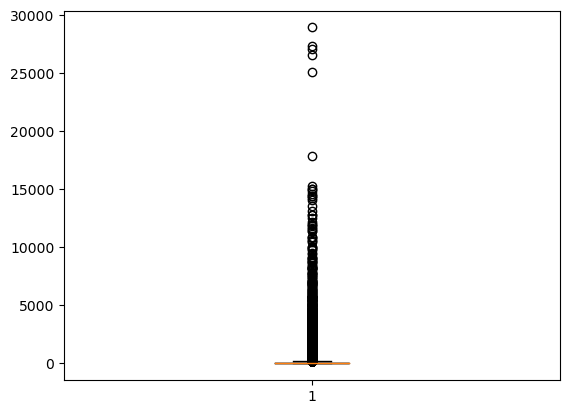

In [33]:
plt.boxplot(df_train['amount(usd)'])

In [34]:
# Under Sampling

In [35]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
# Lets shuffle the data before creating the subsamples

df_train = df_train.sample(frac=1)

# amount of fraud classes 7506 rows.
fraud_df = df_train.loc[df_train['is_fraud'] == 1]
non_fraud_df = df_train.loc[df_train['is_fraud'] == 0][:7506]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,hour_of_day,age,month,category,amount(usd),gender,lat,long,is_fraud
931123,2,53,1,1,355.86,0,32.6176,-86.9475,1
1097474,22,88,3,0,8.75,0,37.2876,-77.2950,1
60865,12,57,2,5,18.35,1,44.5232,-86.2061,0
148342,7,29,3,0,28.91,1,45.7549,-84.4470,0
1208882,23,57,5,0,843.70,0,47.5375,-95.9941,1


In [36]:
X_train = new_df.drop('is_fraud', axis=1)
y_train = new_df['is_fraud']

In [37]:
X_test = df_test.drop('is_fraud', axis=1)
y_test = df_test['is_fraud']

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score    
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [39]:
lst = []

def model_evaluator(classifier, xtrain, ytrain, xtest, ytest):
    classifier.fit(xtrain, ytrain)
    y_pred = classifier.predict(xtest)
    cm = confusion_matrix(ytest, y_pred)
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred)    
    print(classifier)  
    print("Confusion Matrix : \n", cm)
    print("accuracy_score: ", accuracy)
    print("precision: ", precision)
    print("recall: ", recall)       
    print("f1: ", f1)
    lst.append({'accuracy_score': accuracy, 'precision': precision, 'recall': recall, 'f1': f1})

In [40]:
models = [LogisticRegression, KNeighborsClassifier, GaussianNB, SVC]

In [41]:
model_evaluator(LogisticRegression(), X_train, y_train, X_test, y_test)

LogisticRegression()
Confusion Matrix : 
 [[534321  19253]
 [   579   1566]]
accuracy_score:  0.9643128991450716
precision:  0.07521975118881791
recall:  0.73006993006993
f1:  0.13638738895662775


In [42]:
model_evaluator(KNeighborsClassifier(), X_train, y_train, X_test, y_test)

KNeighborsClassifier()
Confusion Matrix : 
 [[510352  43222]
 [   196   1949]]
accuracy_score:  0.9218705856736948
precision:  0.04314715193376281
recall:  0.9086247086247087
f1:  0.08238228083523542


In [43]:
model_evaluator(GaussianNB(), X_train, y_train, X_test, y_test)

GaussianNB()
Confusion Matrix : 
 [[541555  12019]
 [   604   1541]]
accuracy_score:  0.9772852826698385
precision:  0.11364306784660767
recall:  0.7184149184149184
f1:  0.1962432346386501


In [44]:
#model_evaluator(SVC(), X_train, y_train, X_test, y_test)

In [60]:
data = lst
df = pd.DataFrame(data, index=['Logistic Regression', 'KNN', 'Naive Bayes'])
df

ValueError: Length of values (6) does not match length of index (3)

In [47]:
# SMOTETomek

In [48]:
X_train_smt = df_train.drop('is_fraud', axis=1)
y_train_smt = df_train['is_fraud']

In [49]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X_train_smt, y_train_smt)

In [50]:
X.shape,y.shape

((2578338, 8), (2578338,))

In [51]:
#from imblearn.combine import SMOTETomek
#smk = SMOTETomek()
#X_res,y_res=smk.fit_sample(X_train_smtk,y_train_smtk)
#X_res.shape,y_res.shape

In [52]:
model_evaluator(LogisticRegression(), X, y, X_test, y_test)

LogisticRegression()
Confusion Matrix : 
 [[531686  21888]
 [   638   1507]]
accuracy_score:  0.9594651253601191
precision:  0.06441547339175037
recall:  0.7025641025641025
f1:  0.11801096319498824


In [53]:
model_evaluator(KNeighborsClassifier(), X, y, X_test, y_test)

KNeighborsClassifier()
Confusion Matrix : 
 [[547154   6420]
 [   657   1488]]
accuracy_score:  0.9872651465938721
precision:  0.18816388467374812
recall:  0.6937062937062937
f1:  0.29603103551178755


In [54]:
model_evaluator(GaussianNB(), X, y, X_test, y_test)

GaussianNB()
Confusion Matrix : 
 [[543267  10307]
 [   725   1420]]
accuracy_score:  0.9801482403876779
precision:  0.12108808731986015
recall:  0.662004662004662
f1:  0.2047289504036909


In [55]:
#model_evaluator(SVC(), X, y, X_test, y_test)

In [61]:
data = lst
df = pd.DataFrame(data, index=['Logistic Regression', 'KNN', 'Naive Bayes', 'Logistic Regression OS', 'KNN OS', 'Naive Bayes OS'])
df

,accuracy_score,precision,recall,f1
Logistic Regression,0.964313,0.075220,0.730070,0.136387
KNN,0.921871,0.043147,0.908625,0.082382
Naive Bayes,0.977285,0.113643,0.718415,0.196243
Logistic Regression OS,0.959465,0.064415,0.702564,0.118011
KNN OS,0.987265,0.188164,0.693706,0.296031
Naive Bayes OS,0.980148,0.121088,0.662005,0.204729


In [59]:
lst

[{'accuracy_score': 0.9643128991450716,
  'precision': 0.07521975118881791,
  'recall': 0.73006993006993,
  'f1': 0.13638738895662775},
 {'accuracy_score': 0.9218705856736948,
  'precision': 0.04314715193376281,
  'recall': 0.9086247086247087,
  'f1': 0.08238228083523542},
 {'accuracy_score': 0.9772852826698385,
  'precision': 0.11364306784660767,
  'recall': 0.7184149184149184,
  'f1': 0.1962432346386501},
 {'accuracy_score': 0.9594651253601191,
  'precision': 0.06441547339175037,
  'recall': 0.7025641025641025,
  'f1': 0.11801096319498824},
 {'accuracy_score': 0.9872651465938721,
  'precision': 0.18816388467374812,
  'recall': 0.6937062937062937,
  'f1': 0.29603103551178755},
 {'accuracy_score': 0.9801482403876779,
  'precision': 0.12108808731986015,
  'recall': 0.662004662004662,
  'f1': 0.2047289504036909}]